# Demo for functional usage of CFG-explorer

Now, `cfg-explorer` can not only be used as a command line tool. We can also call it within a Python program.

## Download Spec CPU Benchmark 2006

Save the suite outside our current repository:

```
$ cd ..
$ git clone https://github.com/Multi2Sim/m2s-bench-spec2006
```

Every `.i386` file is a binary file for testing.

## Import Libraries

First, to import `cfg_explore` in this subdirectory, you should include your `cfg-explorer` path into your `PATH` environment variable. You can do this by (suppose the whole `cfg-explorer` directory is located in `$HOME/cfg-explorer`):

```
$ export PATH=$HOME/cfg-explorer:$PATH
```

Or import it in this notebook with absolute path as:

In [1]:
import os
import sys
sys.path.insert(0,'/home/wolixinyi/cfg-explorer/')

##  Usages of `cfg_explore` Function

In [2]:
from cfgexplorer import cfg_explore

### Lanuch an interactive web app

Now, call `cfg_explore` with the only argument `binary`, which is the path of the bianry file we prepare to analysis. After running, it will host a website on http://127.0.0.1:5050/ to show the *control flow graph* of the file. You can specify the port by `port` parameter.

In [3]:
cfg_explore(binary='../../m2s-bench-spec2006/999.specrand/specrand_base.i386')

WARNING | 2020-07-26 06:47:25,653 | angr.analyses.cfg.cfg_fast | "collect_data_references" is deprecated and will be removed soon. Please use "data_references" instead
100% |###################################| Elapsed Time: 0:00:00 Time:  0:00:00


 * Serving Flask app "cfgexplorer.explorer" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


INFO    | 2020-07-26 06:47:26,035 | werkzeug |  * Running on http://127.0.0.1:5050/ (Press CTRL+C to quit)


Whenever you want to shut down the app, just interrupt the function. For example, in this notebook, click on <kbd>interrupt the kernel</kbd>buttom on the toolbar.

### Export raw `.dot` files

In [4]:
cfg_explore(binary='../../m2s-bench-spec2006/999.specrand/specrand_base.i386',output='test.dot')

WARNING | 2020-07-26 06:47:34,852 | angr.analyses.cfg.cfg_fast | "collect_data_references" is deprecated and will be removed soon. Please use "data_references" instead
100% |###################################| Elapsed Time: 0:00:00 Time:  0:00:00


`.dot` file can be converted to image format, for example, if you have installed `graphviz` in your machine, try this command:

In [5]:
!dot test.dot -Tpng -o test.png

![](output/test.png)

### Export `.svg` files

You can also specify the `output` argument with `.svg` suffix, and you will get the same graph as what you see in the web app without `output` [before](#Lanuch-an-interactive-web-app)

In [6]:
cfg_explore(binary='../../m2s-bench-spec2006/999.specrand/specrand_base.i386',output='./test.svg')

WARNING | 2020-07-26 06:47:41,338 | angr.analyses.cfg.cfg_fast | "collect_data_references" is deprecated and will be removed soon. Please use "data_references" instead
100% |###################################| Elapsed Time: 0:00:00 Time:  0:00:00


`.svg` files can be opened by web-browser directly, it can also be displayed in this notebook:

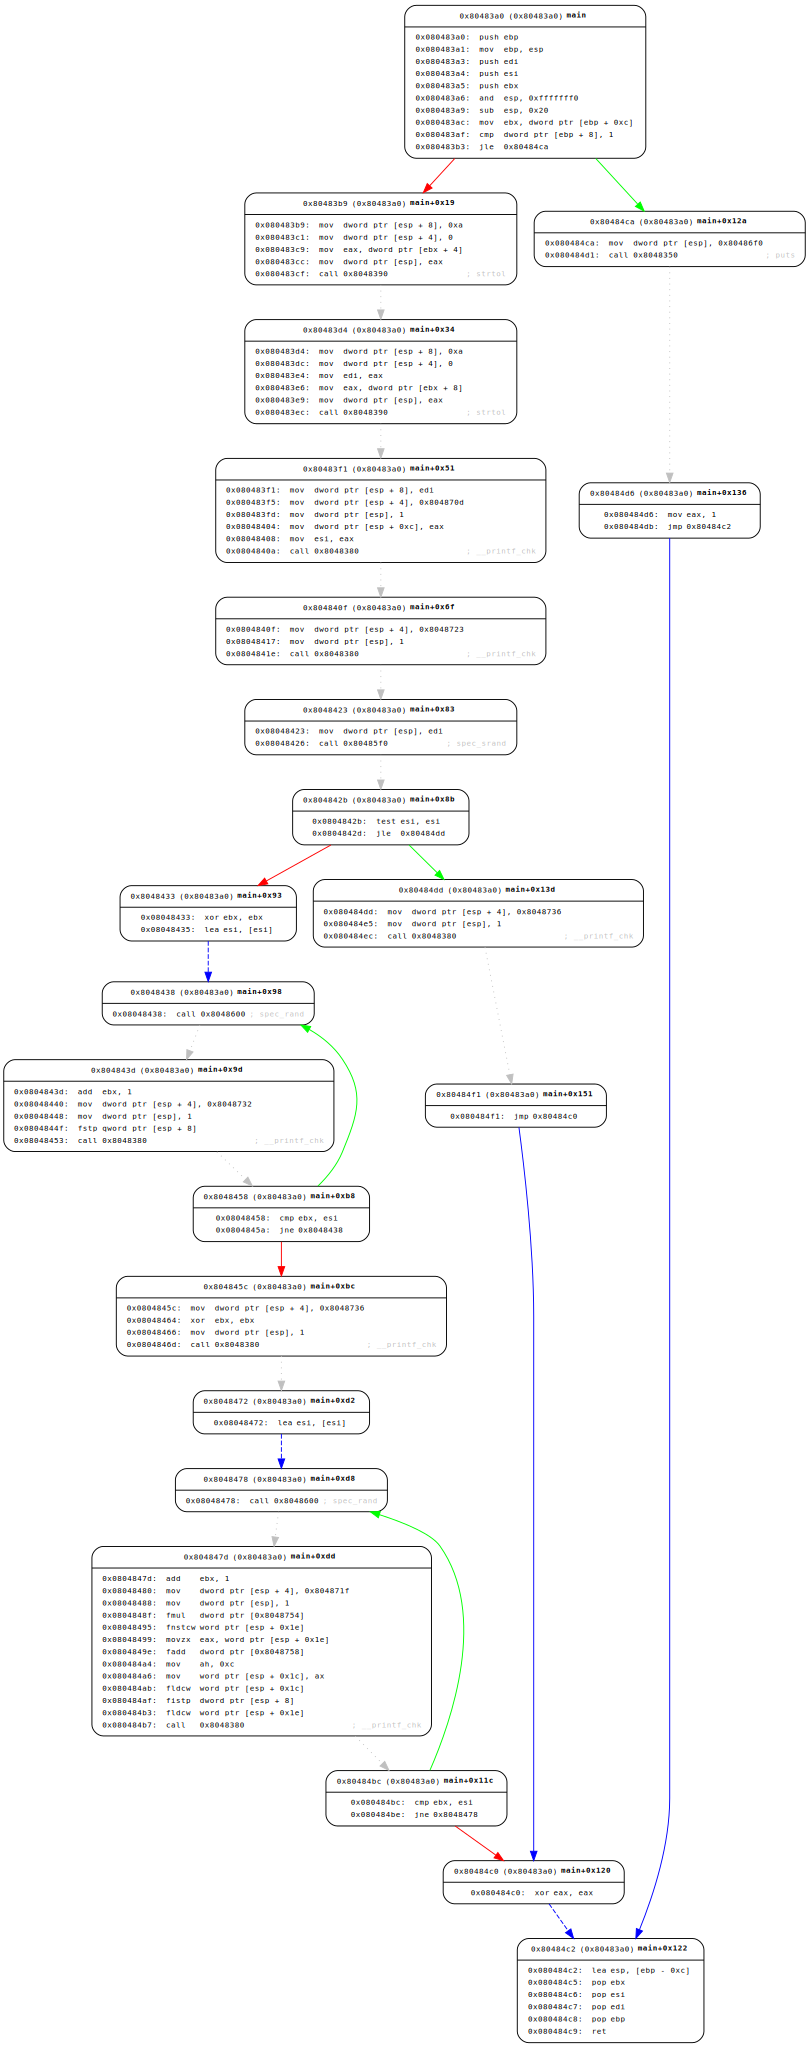

In [7]:
from IPython.core.display import SVG
display(SVG('test.svg'))

There are also many online tools availble that convert `.svg` to other format files. Besides, if you have installed `inkscape`, you can use:

In [10]:
!inkscape test.svg --export-area-drawing --without-gui --export-pdf=test.pdf

Failed to get connection
** (inkscape:29023): CRITICAL **: 06:49:30.392: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:29023): CRITICAL **: 06:49:30.392: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:29023): CRITICAL **: 06:49:30.392: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed


And now, you can open [test.pdf](test.pdf) directly to view the *control flow graph*.

In [13]:
from glob import glob
progs = sorted(glob('../../m2s-bench-spec2006/*/*.i386'))
progs

['../../m2s-bench-spec2006/401.bzip2/bzip2_base.i386',
 '../../m2s-bench-spec2006/403.gcc/gcc_base.i386',
 '../../m2s-bench-spec2006/410.bwaves/bwaves_base.i386',
 '../../m2s-bench-spec2006/416.gamess/gamess_base.i386',
 '../../m2s-bench-spec2006/429.mcf/mcf_base.i386',
 '../../m2s-bench-spec2006/433.milc/milc_base.i386',
 '../../m2s-bench-spec2006/434.zeusmp/zeusmp_base.i386',
 '../../m2s-bench-spec2006/435.gromacs/gromacs_base.i386',
 '../../m2s-bench-spec2006/436.cactusADM/cactusADM_base.i386',
 '../../m2s-bench-spec2006/437.leslie3d/leslie3d_base.i386',
 '../../m2s-bench-spec2006/444.namd/namd_base.i386',
 '../../m2s-bench-spec2006/445.gobmk/gobmk_base.i386',
 '../../m2s-bench-spec2006/447.dealII/dealII_base.i386',
 '../../m2s-bench-spec2006/450.soplex/soplex_base.i386',
 '../../m2s-bench-spec2006/453.povray/povray_base.i386',
 '../../m2s-bench-spec2006/454.calculix/calculix_base.i386',
 '../../m2s-bench-spec2006/456.hmmer/hmmer_base.i386',
 '../../m2s-bench-spec2006/458.sjeng/sjen

In [14]:
# create a directory to store the outputs
out_dir = './output'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

In [ ]:
for p in progs:
    name = p.split('/')[3]
    print('start analysis of:',name)
    output_file = os.path.join(out_dir, name + '.svg')
    if not os.path.exists(output_file):
        cfg_explore(binary=p,output=output_file)

WARNING | 2020-07-26 06:52:39,636 | angr.analyses.cfg.cfg_fast | "collect_data_references" is deprecated and will be removed soon. Please use "data_references" instead
  8% |###                                | Elapsed Time: 0:00:00 ETA:   0:00:00

start analysis of: 401.bzip2
start analysis of: 403.gcc
start analysis of: 410.bwaves
start analysis of: 416.gamess
start analysis of: 429.mcf


100% |###################################| Elapsed Time: 0:00:00 Time:  0:00:00


start analysis of: 433.milc


WARNING | 2020-07-26 06:52:40,848 | angr.analyses.cfg.cfg_fast | "collect_data_references" is deprecated and will be removed soon. Please use "data_references" instead
  1% |                                   | Elapsed Time: 0:00:00 ETA:   0:00:11WARNING | 2020-07-26 06:52:41,133 | angr.state_plugins.symbolic_memory | The program is accessing memory or registers with an unspecified value. This could indicate unwanted behavior.
WARNING | 2020-07-26 06:52:41,136 | angr.state_plugins.symbolic_memory | angr will cope with this by generating an unconstrained symbolic variable and continuing. You can resolve this by:
WARNING | 2020-07-26 06:52:41,138 | angr.state_plugins.symbolic_memory | 1) setting a value to the initial state
WARNING | 2020-07-26 06:52:41,141 | angr.state_plugins.symbolic_memory | 2) adding the state option ZERO_FILL_UNCONSTRAINED_{MEMORY,REGISTERS}, to make unknown regions hold null
WARNING | 2020-07-26 06:52:41,141 | angr.state_plugins.symbolic_memory | 3) adding the sta

WARNING | 2020-07-26 06:52:41,657 | angr.state_plugins.symbolic_memory | Filling memory at 0x7fff0000 with 4 unconstrained bytes referenced from 0x8081456 (kill+0x6 in milc_base.i386 (0x8081456))
  3% |#                                  | Elapsed Time: 0:00:00 ETA:   0:00:27WARNING | 2020-07-26 06:52:41,809 | angr.state_plugins.symbolic_memory | Filling memory at 0x7fff0004 with 4 unconstrained bytes referenced from 0x809bda2 (__access+0x2 in milc_base.i386 (0x809bda2))
WARNING | 2020-07-26 06:52:41,813 | angr.state_plugins.symbolic_memory | Filling memory at 0x7fff0000 with 4 unconstrained bytes referenced from 0x809bda6 (__access+0x6 in milc_base.i386 (0x809bda6))
WARNING | 2020-07-26 06:52:41,833 | angr.state_plugins.symbolic_memory | Filling memory at 0x7fff0000 with 4 unconstrained bytes referenced from 0x809be01 (tcgetattr+0x11 in milc_base.i386 (0x809be01))
WARNING | 2020-07-26 06:52:41,839 | angr.state_plugins.symbolic_memory | Filling memory at 0x7fff0004 with 4 unconstrained 

WARNING | 2020-07-26 06:52:47,656 | angr.state_plugins.symbolic_memory | Filling memory at 0x7fff0000 with 4 unconstrained bytes referenced from 0x80739bd (close+0x2d in milc_base.i386 (0x80739bd))
WARNING | 2020-07-26 06:52:47,673 | angr.state_plugins.symbolic_memory | Filling memory at 0x7fff0008 with 4 unconstrained bytes referenced from 0x8073961 (open+0x31 in milc_base.i386 (0x8073961))
WARNING | 2020-07-26 06:52:47,677 | angr.state_plugins.symbolic_memory | Filling memory at 0x7fff0004 with 4 unconstrained bytes referenced from 0x8073965 (open+0x35 in milc_base.i386 (0x8073965))
WARNING | 2020-07-26 06:52:47,681 | angr.state_plugins.symbolic_memory | Filling memory at 0x7fff0000 with 4 unconstrained bytes referenced from 0x8073969 (open+0x39 in milc_base.i386 (0x8073969))
 45% |###############                    | Elapsed Time: 0:00:26 ETA:   0:00:32ERROR   | 2020-07-26 06:53:07,798 | angr.analyses.propagator.engine_vex.SimEnginePropagatorVEX | Unsupported Binop Iop_32HLto64.
ERR

start analysis of: 434.zeusmp
